# Honey Production

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

## Check out the Data

1. It is called df and has the following columns:

- state
- numcol
- yieldpercol
- totalprod
- stocks
- priceperlb
- prodvalue
- year

Use .head() to get a sense of how this DataFrame is structured.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv("honeyproduction.csv")

print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


2. For now, we care about the total production of honey per year. Use the .groupby() method provided by pandas to get the mean of totalprod per year.

Store this in a variable called prod_per_year.

In [2]:
prod_per_year = df.groupby("year").totalprod.mean().reset_index()

print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


3. Create a variable called X that is the column of years in this prod_per_year DataFrame.

After creating X, we will need to reshape it to get it into the right format.

In [3]:
X = prod_per_year.year
X = X.values.reshape(-1, 1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


4. Create a variable called y that is the totalprod column in the prod_per_year dataset.

In [4]:
y = prod_per_year.totalprod

5. Using plt.scatter(), plot y vs X as a scatterplot.

Can you see a vaguely linear relationship between these variables?

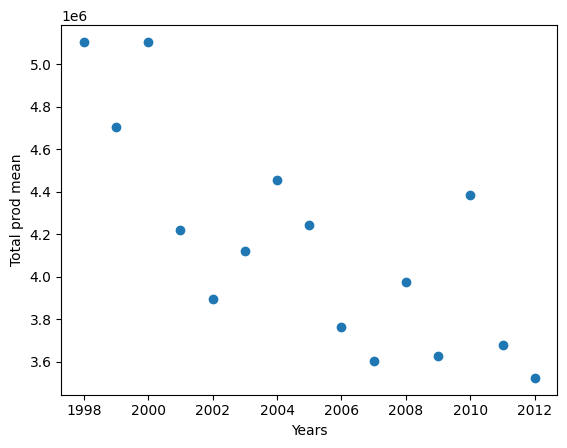

<Figure size 640x480 with 0 Axes>

In [5]:
plt.scatter(X, y)
plt.xlabel("Years")
plt.ylabel("Total prod mean")
plt.show()
plt.clf()

#It looks like a waek negative correlation.

## Create and Fit a Linear Regression Model

6. Create a linear regression model from scikit-learn and call it regr.

Use the LinearRegression() constructor from the linear_model module to do this.

In [6]:
regr = LinearRegression()

7. Fit the model to the data by using .fit().

In [7]:
regr.fit(X, y)

LinearRegression()

8. After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) and the intercept of the line (regr.intercept_).

In [8]:
print("Slope value: {}".format(regr.coef_[0]))
print("Intercept value: {}".format(regr.intercept_))

Slope value: -88303.18915238192
Intercept value: 181208083.10732976


9. Create a list called y_predict that is the predictions your regr model would make on the X data.

In [9]:
y_predict = regr.predict(X)

10. Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

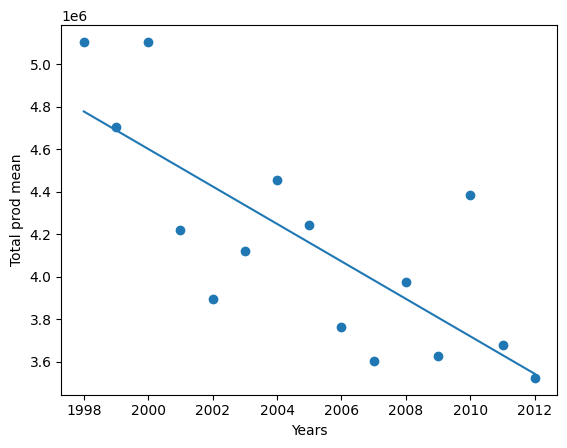

<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.xlabel("Years")
plt.ylabel("Total prod mean")
plt.show()
plt.clf()

## Predict the Honey Decline

11. So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050.

After creating that array, we need to reshape it for scikit-learn.

You can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.

In [11]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)
print(X_future)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]
 [2050]]


12. Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.

In [12]:
future_predict = regr.predict(X_future)

13. Plot future_predict vs X_future on a different plot.

How much honey will be produced in the year 2050, according to this?

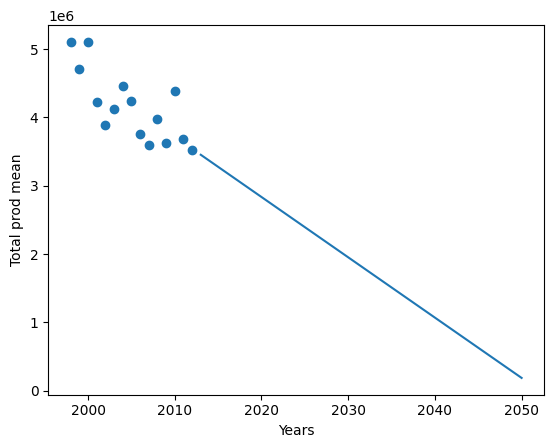

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(X, y)
plt.plot(X_future, future_predict)
plt.xlabel("Years")
plt.ylabel("Total prod mean")
plt.show()
plt.clf() #Less than 1,000,000

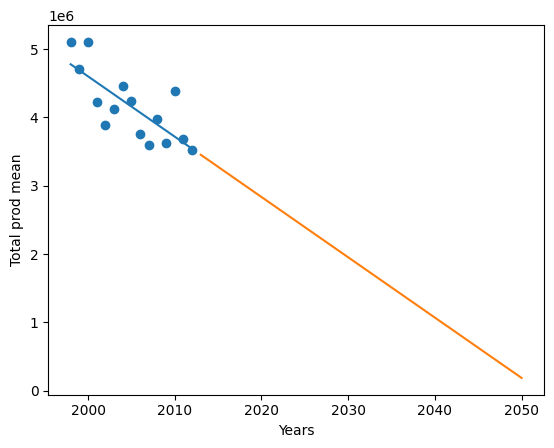

<Figure size 640x480 with 0 Axes>

In [14]:
#Complete graph

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.xlabel("Years")
plt.ylabel("Total prod mean")
plt.show()
plt.clf()